Football (Semantic Segmentation) 
Dataset source : [Kaggle Link to dataset](https://www.kaggle.com/datasets/sadhliroomyprime/football-semantic-segmentation/data)

100 frames of pixel-perfect semantic segmentation with 11 classes.
- developed for the FIFA 2022 in Qatar 
- 100 frames taken at every 12th frame (match between Real Madrid and Manchester United) 

11 standard classes: `Goal Bar`, `Referee`, `Advertisement`, `Ground`, `Ball`, `Coaches and Officials`, `Audience`, `Goalkeeper A`, `Goalkeeper B`, `Team A`, and `Team B`. 

- used superAnnotate's pixel editor to label and classify images 
- dataset created by ACME AI Ltd. 
- contains COCO for optimized interoperability and visual understanding.



In [1]:
import cv2 
import numpy as np 
import torch
import glob 
import matplotlib.pyplot as plt 

- images are in `jpg` 
- masks are in `png`, with suffix `__fuse`

In [ ]:
image_path_list = glob.glob('./images/*.jpg')
mask_path_list = glob.glob('./images/*__fuse.png')

Total number of images

In [5]:
f'total number of images {len(image_path_list)} and respective mask {len(mask_path_list)}'

'total number of images 100 and respective mask 100'

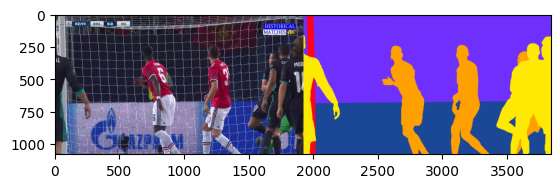

In [8]:
mask = cv2.imread(mask_path_list[0])[:,:,::-1]
image = cv2.imread(image_path_list[0])[:, :, ::-1]
plt.imshow(np.hstack([image,mask]) )

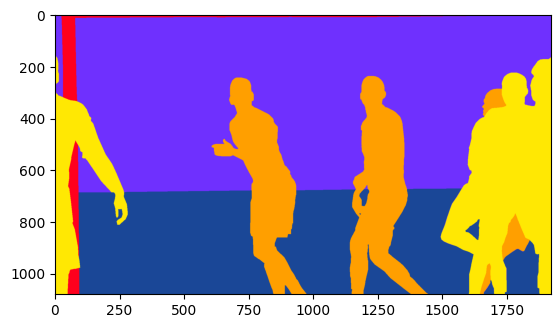

In [11]:
np_image = mask.reshape(-1, 3)
no_of_colors = 5 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(np.float32(np_image), no_of_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
seg_data = centers[labels.flatten()] # mapping labels to center points (RGB values)

# reshape data into original
seg_image = seg_data.reshape((image.shape))
plt.imshow(seg_image)

In [19]:
unique_valus = np.unique(np_images.reshape(-1, 3), axis=0)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le.fit(np_images.reshape(-1, 1))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [34]:
mask = torch.tensor([
    [[1, 2, 1], [1, 2, 3], [11, 22, 33], [1, 2, 1], [1, 2, 3], [11, 22, 33]],
    [[1, 2, 1], [1, 2, 3], [11, 22, 33], [1, 2, 1], [1, 2, 3], [11, 22, 33]],
    [[1, 2, 1], [1, 2, 3], [11, 22, 33], [1, 2, 1], [1, 2, 3], [11, 22, 33]],
    [[1, 2, 1], [1, 2, 3], [11, 22, 33], [1, 2, 1], [1, 2, 3], [11, 22, 33]],
    [[1, 2, 1], [1, 2, 3], [11, 22, 33], [1, 2, 1], [1, 2, 3], [11, 22, 33]],
])

In [38]:
torch.sum(mask).item()

760

First Tensor: tensor([ 4.4000,  2.4000, -9.1000, -5.3100,  5.3000])
Second Tensor: tensor([ 4.4000,  5.5000, -9.1000, -5.3100, 43.0000])
tensor([ True, False,  True,  True, False])


In [23]:
import albumentations as A 
from albumentations.pytorch import ToTensorV2


In [27]:
transformations = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    # A.Blur(blur_limit=(1, 5), p=0.6),
    # A.CLAHE(clip_limit=(1, 4), tile_grid_size=(8, 8), p=0.25),
    # A.RandomBrightnessContrast(p=0.5),
    # A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.6),
    # A.Rotate(limit=(-90, 90), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None, rotate_method='largest_box', crop_border=False, p=1.0),
    # A.SafeRotate(limit=(-45, 45), interpolation=0, border_mode=0, value=(0, 0, 0), p=0.6),
    # A.augmentations.transforms.Normalize
    A.ChannelShuffle(p=0.8),
    ToTensorV2(),
])

In [36]:
for i in transformations.to_dict()['transform']['transforms']:
    print(i['__class_fullname__'])

Resize
HorizontalFlip
VerticalFlip
ChannelShuffle
ToTensorV2
